<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Diabetes 데이터로 모델링합니다.
- Decision Tree 알고리즘으로 모델링합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/diabetes.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**데이터설명**

피마 인디언 당뇨 데이터셋은 몇 명의 여성 피마 인디언의 진료 자료와 진단 후 5년 내 당뇨 발병 여부로 구성됨

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

**diabetes**

- 당뇨병(糖尿病, diabetes)은 높은 혈당 수치가 오랜 기간 지속되는 대사 질환이다. 
- 혈당이 높을 때의 증상으로는 소변이 잦아지고, 갈증과 배고픔이 심해진다. 
- 이를 치료하지 않으면 다른 합병증을 유발할 수 있다.
(출처: 위키백과)

In [4]:
# 기초통계량 확인
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# 범주값 개수 확인
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
# 상관관계 확인
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [7]:
# Target 설정
target = 'Outcome'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

In [8]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.

In [20]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# 2단계: 선언하기
model1 = DecisionTreeClassifier(random_state=2022)

In [22]:
# 3단계: 학습하기
model1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [23]:
# 4단계: 예측하기
y_pred1 = model1.predict(x_test)

In [24]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[115  36]
 [ 38  42]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       151
           1       0.54      0.53      0.53        80

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.68      0.68      0.68       231



In [25]:
# 2단계: 선언하기
model2 = DecisionTreeClassifier(max_depth=3, random_state=2022)

# 3단계: 학습하기
model2.fit(x_train, y_train)

# 4단계: 예측하기
y_pred2 = model2.predict(x_test)

# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[120  31]
 [ 41  39]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.49      0.52        80

    accuracy                           0.69       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.68      0.69      0.68       231



In [27]:
# 2단계: 선언하기
model3 = DecisionTreeClassifier(max_depth=5, random_state=2022)

# 3단계: 학습하기
model3.fit(x_train, y_train)

# 4단계: 예측하기
y_pred3 = model3.predict(x_test)

# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[134  17]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       151
           1       0.66      0.41      0.51        80

    accuracy                           0.72       231
   macro avg       0.70      0.65      0.66       231
weighted avg       0.71      0.72      0.70       231



# 5.기타

- 기타 필요한 내용이 있으면 진횅합니다.

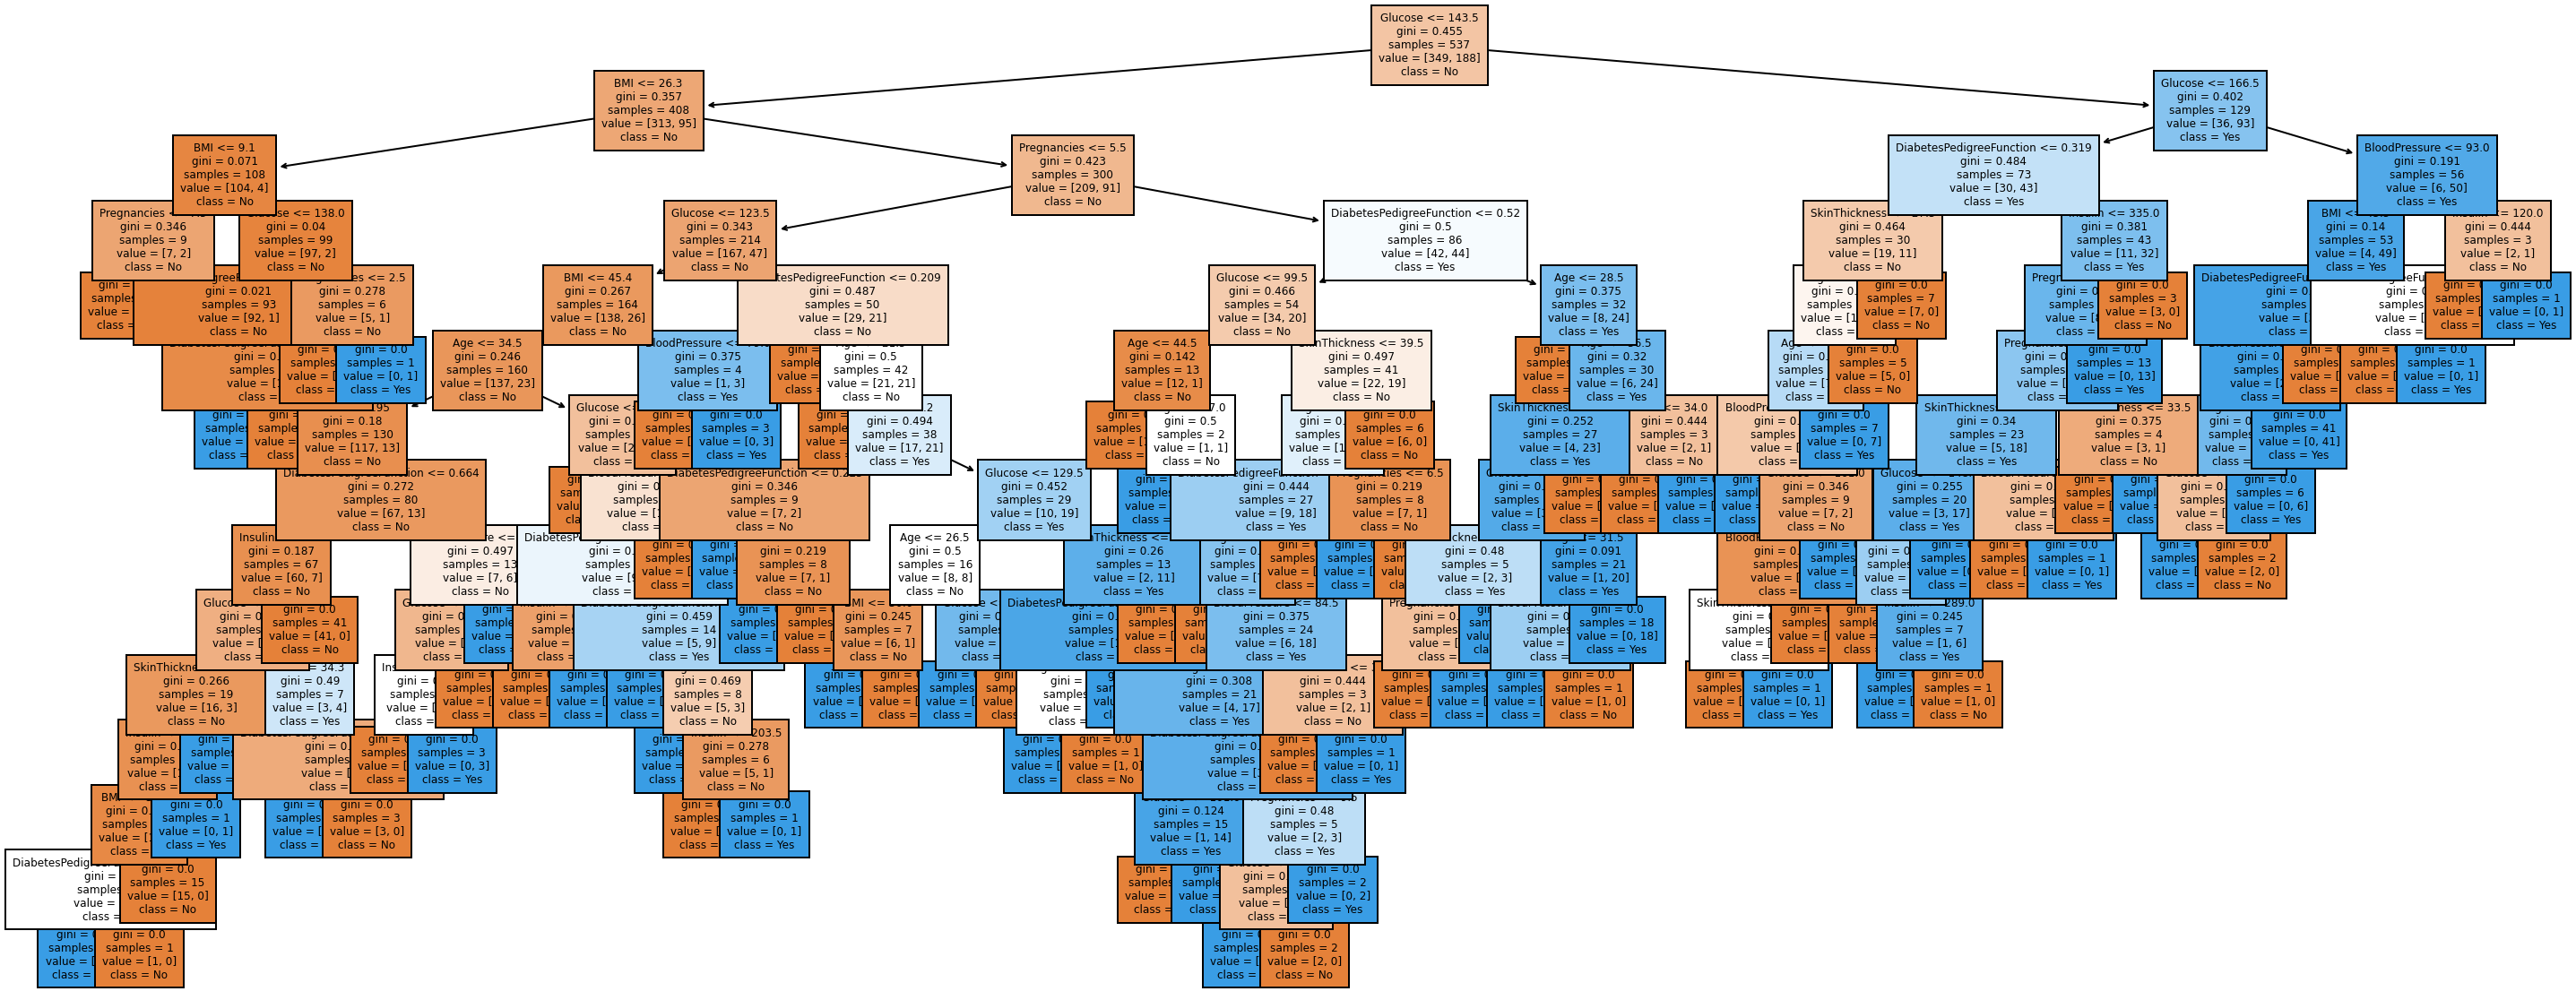

In [18]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plot_tree(model1,
          filled=True,
          feature_names=list(x),
          class_names=['No', 'Yes'],
          fontsize=6)
plt.show()

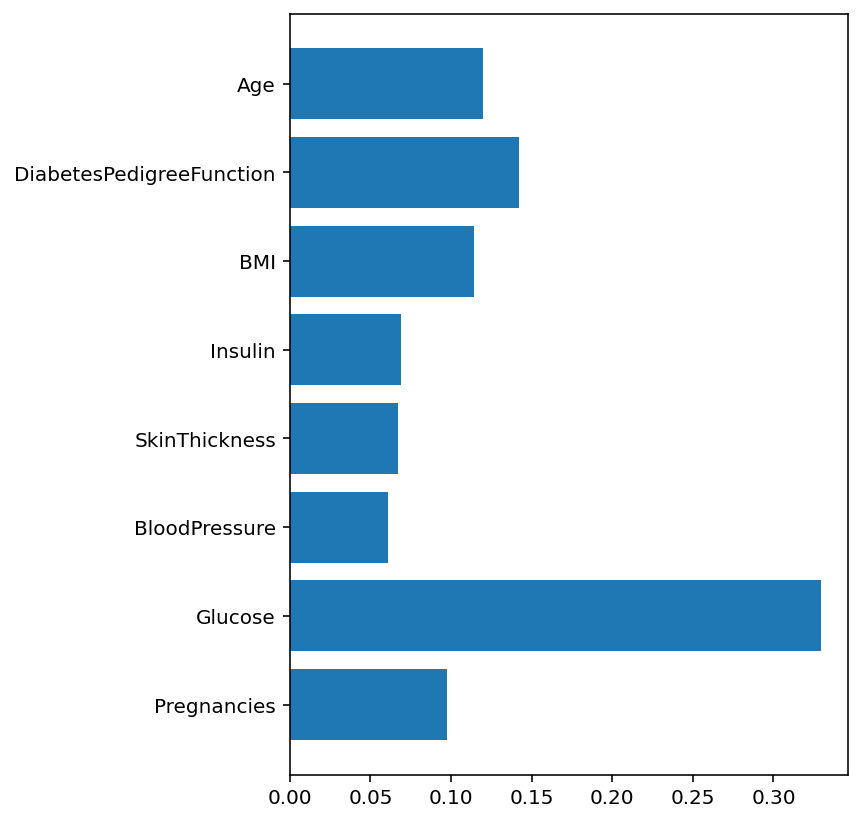

In [19]:
# 변수 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(y=list(x), width=model1.feature_importances_)
plt.show()


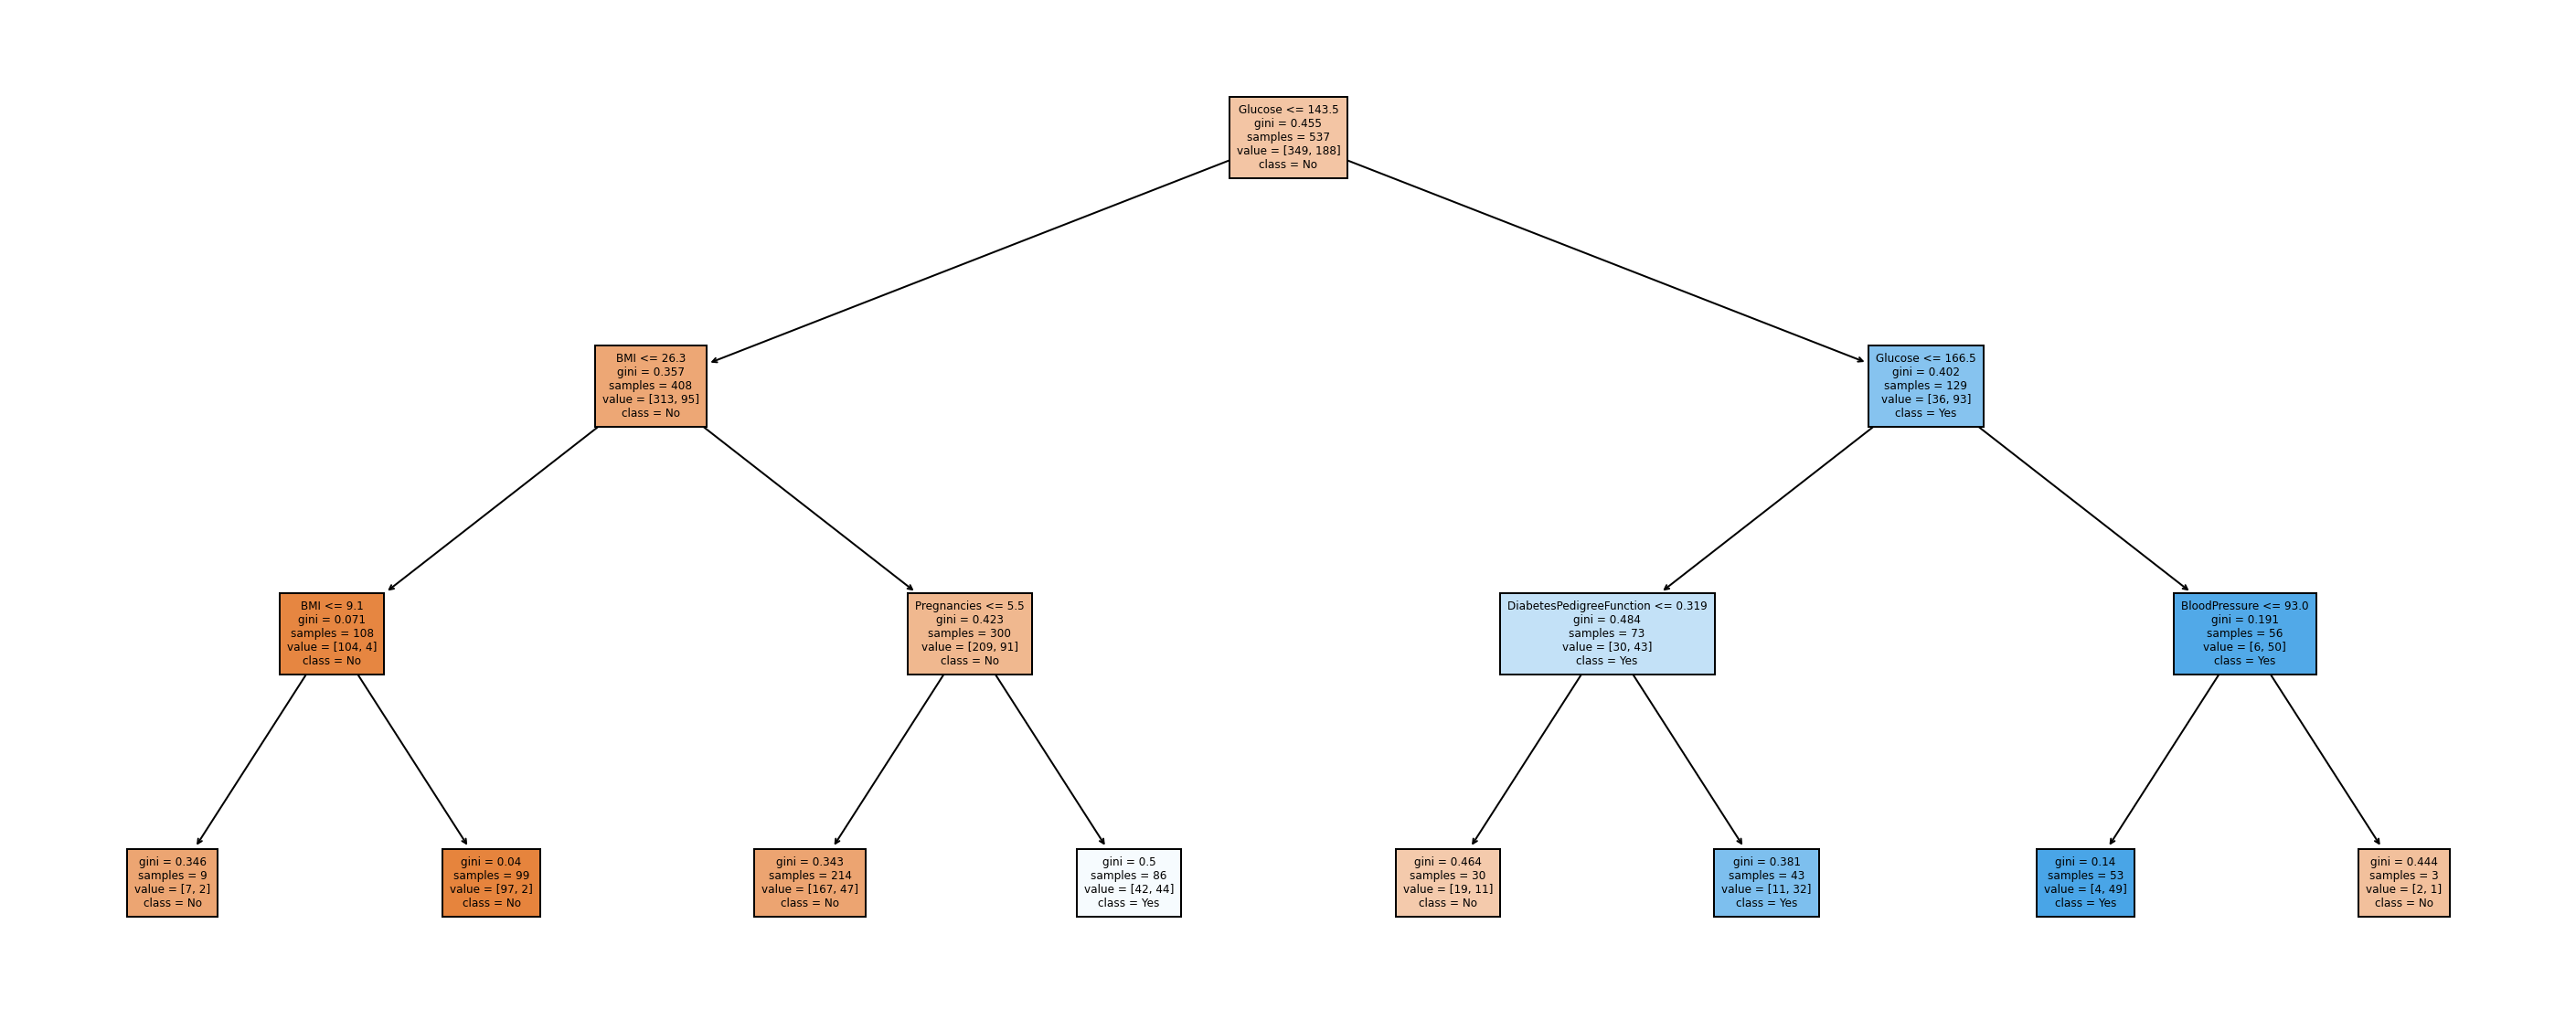

In [28]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plot_tree(model2,
          filled=True,
          feature_names=list(x),
          class_names=['No', 'Yes'],
          fontsize=6)
plt.show()

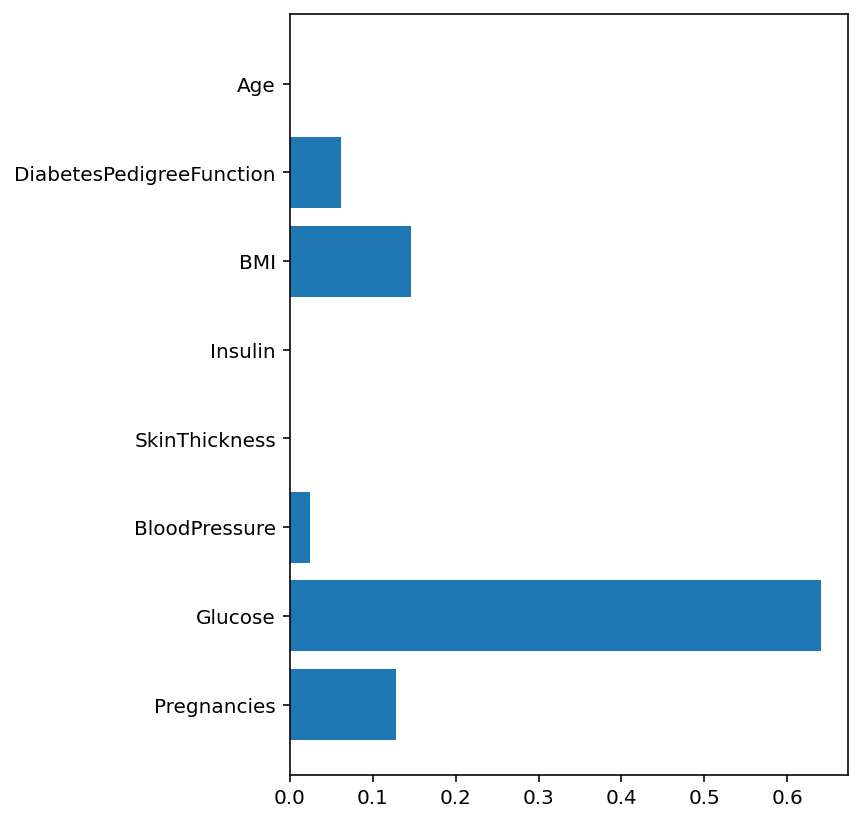

In [30]:
# 변수 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(y=list(x), width=model2.feature_importances_)
plt.show()

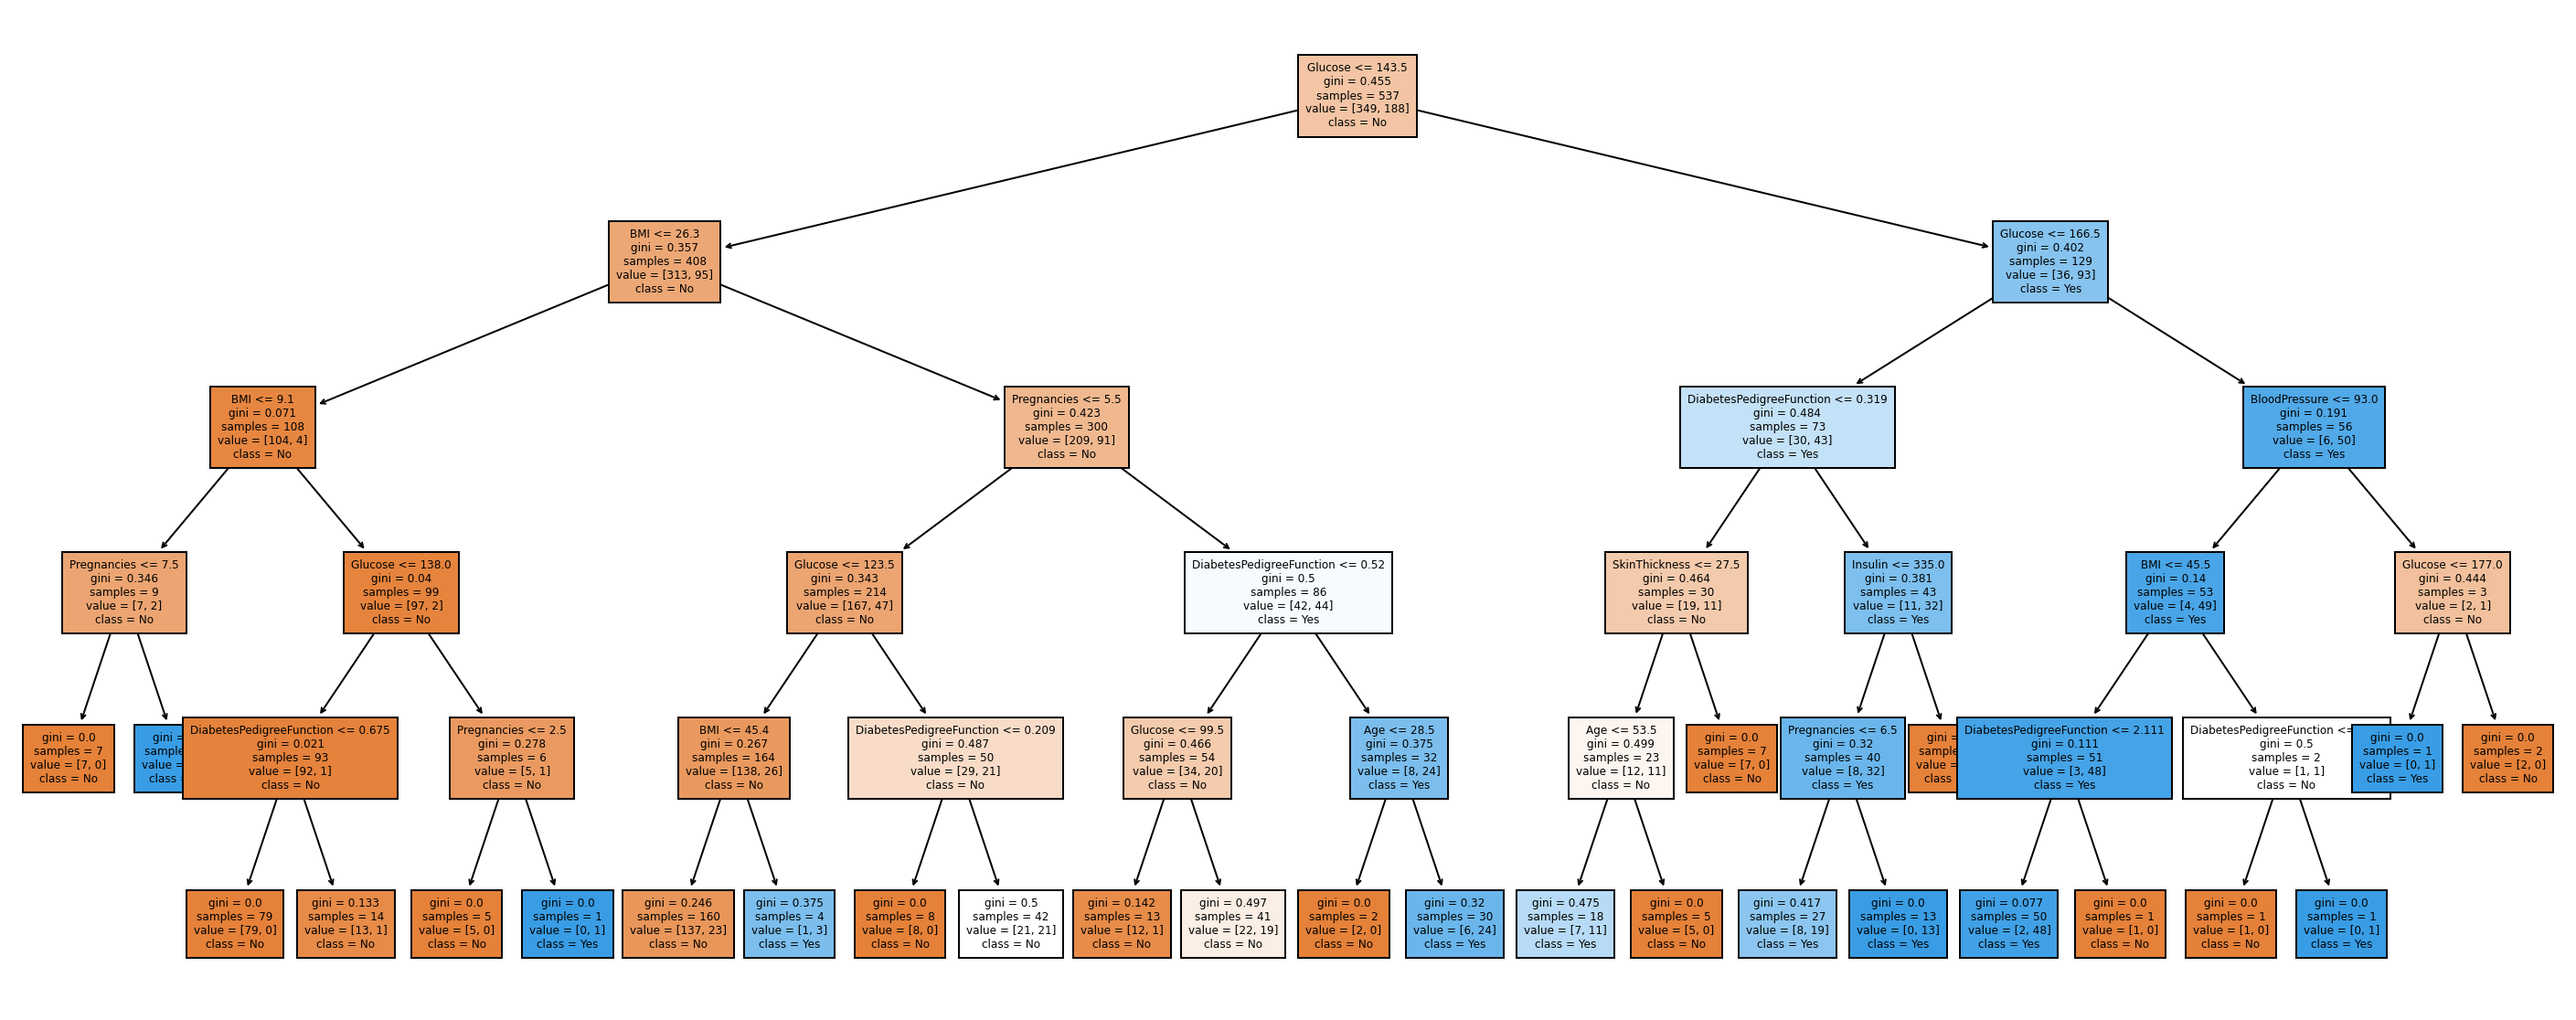

In [29]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plot_tree(model3,
          filled=True,
          feature_names=list(x),
          class_names=['No', 'Yes'],
          fontsize=6)
plt.show()

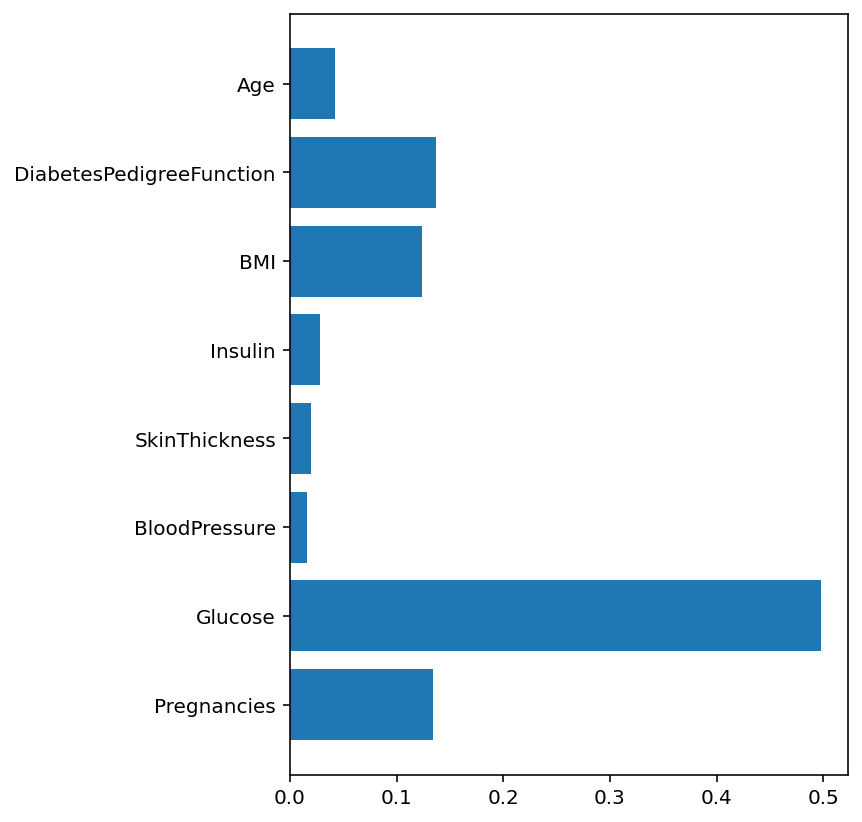

In [31]:
# 변수 중요도 시각화
plt.figure(figsize=(5, 7))
plt.barh(y=list(x), width=model3.feature_importances_)
plt.show()